In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston= load_boston()

In [4]:
# to check the column names
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# to check where the file exists on your system
boston.filename

'G:\\Zeba\\New_anaconda\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [6]:
boston.feature_names  # I/p column names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [9]:
df['MEDV']=boston.target

In [10]:
X=df.loc[:,'CRIM':'LSTAT'] #or X=df.drop(['MEDV'],axis=1) 
y=df['MEDV']

# Create Train & test data

In [11]:
from sklearn import model_selection

In [12]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(354, 13) (152, 13) (354,) (152,)


# Building Model

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
lm=LinearRegression(n_jobs=-1)
lm.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [16]:
print(lm.intercept_,lm.coef_)
print(df.columns.values.tolist())

31.631084035694585 [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [17]:
print(list(zip(df.columns,lm.coef_)))

[('CRIM', -0.13347010285294425), ('ZN', 0.03580891359323082), ('INDUS', 0.049522645220057185), ('CHAS', 3.1198351162854077), ('NOX', -15.41706089530688), ('RM', 4.057199231645392), ('AGE', -0.010820835184930837), ('DIS', -1.3859982431608768), ('RAD', 0.24272733982224357), ('TAX', -0.00870223436566267), ('PTRATIO', -0.9106852081102922), ('B', 0.011794115892570081), ('LSTAT', -0.5471133128239593)]


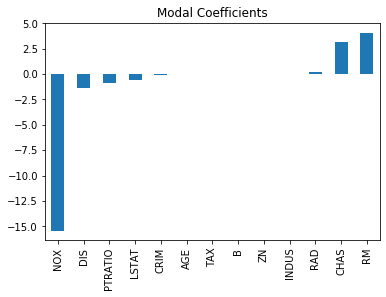

In [27]:
predictors=df.columns[:-1]
coef =pd.Series(lm.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')



In [28]:
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [33]:
import matplotlib.pyplot as plt

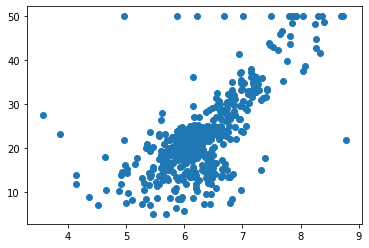

In [34]:
#plt.scatter(df['NOX'],df['MEDV'])
plt.scatter(df.RM,df.MEDV)

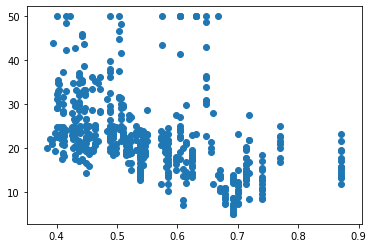

In [35]:
plt.scatter(df.NOX,df.MEDV)

In [36]:

print('R2 Value/Coefficient of Determination: {}'.format(lm.score(xtest, ytest)))

R2 Value/Coefficient of Determination: 0.711226005748496



Final prediction


In [38]:
import numpy as np

4.748208239685937
4.638689926172797


,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


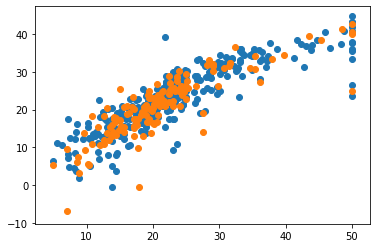

In [42]:
from sklearn.metrics import mean_squared_error

plt.scatter(ytrain, lm.predict(xtrain))
print(np.sqrt(mean_squared_error(ytrain, lm.predict(xtrain))))
plt.scatter(ytest,lm.predict(xtest))
print(np.sqrt(mean_squared_error(ytest, lm.predict(xtest))))
pd.DataFrame({'Actual':ytest, 'Predicted': lm.predict(xtest)}).head()